# Assignment 6: Apply NB

In [50]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from sklearn.naive_bayes import MultinomialNB

from scipy.sparse import hstack

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [52]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)

import pandas
data = pandas.read_csv('/content/drive/MyDrive/Copy of preprocessed_data.csv')

##1.2 Splitting data into Train and cross validation(or test): Stratified Sampling

In [53]:
# Split the dataset 
# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)



###1.splitting

In [54]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [56]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)
vectorizer =  CountVectorizer(ngram_range=(1,4),max_features=5000)
x_train_essay_bow = vectorizer.fit_transform(x_train['essay'].values)
x_test_essay_bow = vectorizer.transform(x_test['essay'].values)

print()

In [57]:
print(x_train_essay_bow.shape, y_train.shape)
print(x_test_essay_bow.shape, y_test.shape)

(73196, 5000) (73196,)
(36052, 5000) (36052,)


In [58]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)
tf_idf_vec = TfidfVectorizer(ngram_range=(1,4),max_features=5000)
x_train_essay_tfidf = tf_idf_vec.fit_transform(x_train['essay'].values)
x_test_essay_tfidf = tf_idf_vec.transform(x_test['essay'].values)

##<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [59]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().


###1.4.1 OneHotEncoding schoolstate

In [60]:
enc = CountVectorizer()
x_train_state_ohe = enc.fit_transform(x_train['school_state'].values)
x_test_state_ohe = enc.transform(x_test['school_state'].values)

print("After vectorizations")
print(x_train_state_ohe.shape, y_train.shape)
print(x_test_state_ohe.shape, y_test.shape)
print(enc.get_feature_names())
print("="*100)
state_features = enc.get_feature_names()

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


###1.4.2 Onehotencoding teacher prefix

In [61]:
x_train_teacher_prefix_ohe = enc.fit_transform(x_train['teacher_prefix'].values)
x_test_teacher_prefix_ohe = enc.transform(x_test['teacher_prefix'].values)

print("After vectorizations")
print(x_train_teacher_prefix_ohe.shape, y_train.shape)
print(x_test_teacher_prefix_ohe.shape, y_test.shape)
print(enc.get_feature_names())
print("="*100)
teacher_prefix_features = enc.get_feature_names()

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


###1.4.3 Onehotencoding project_grade_category

In [62]:
x_train_pgc_ohe = enc.fit_transform(x_train['project_grade_category'].values)
x_test_pgc_ohe = enc.transform(x_test['project_grade_category'].values)

print("After vectorizations")
print(x_train_pgc_ohe.shape, y_train.shape)
print(x_test_pgc_ohe.shape, y_test.shape)
print(enc.get_feature_names())
print("="*100)
project_grade_features = enc.get_feature_names()

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


###1.4.4 clean_categories

In [63]:
x_train_clean_cat_ohe = enc.fit_transform(x_train['clean_categories'].values)
x_test_clean_cat_ohe = enc.transform(x_test['clean_categories'].values)

print("After vectorizations")
print(x_train_clean_cat_ohe.shape, y_train.shape)
print(x_test_clean_cat_ohe.shape, y_test.shape)
print(enc.get_feature_names())
print("="*100)
clean_cat_faetures = enc.get_feature_names()

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


###1.4.5 Onehotencoding clean_subcategories

In [64]:
x_train_clean_subcat_ohe = enc.fit_transform(x_train['clean_subcategories'].values)
x_test_clean_subcat_ohe = enc.transform(x_test['clean_subcategories'].values)

print("After vectorizations")
print(x_train_clean_subcat_ohe.shape, y_train.shape)
print(x_test_clean_subcat_ohe.shape, y_test.shape)
print(enc.get_feature_names())
print("="*100)
clean_subcat_features = enc.get_feature_names()

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


###1.4.6 Encoding price

In [65]:
normalizer = Normalizer()

normalizer.fit(x_train['price'].values.reshape(-1, 1))

x_train_price_norm = normalizer.transform(x_train['price'].values.reshape(-1,1))

x_test_price_norm = normalizer.transform(x_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(x_train_price_norm.shape, y_train.shape)

print(x_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


##<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### Set 1

In [66]:
x_tr = hstack((x_train_essay_bow, x_train_state_ohe, x_train_teacher_prefix_ohe, x_train_pgc_ohe,x_train_clean_cat_ohe,x_train_clean_subcat_ohe, x_train_price_norm)).tocsr()
x_te = hstack((x_test_essay_bow, x_test_state_ohe, x_test_teacher_prefix_ohe, x_test_pgc_ohe,x_test_clean_cat_ohe,x_test_clean_subcat_ohe, x_test_price_norm)).tocsr()

print("Final Data matrix")
print(x_tr.shape, y_train.shape)
print(x_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 5100) (73196,)
(36052, 5100) (36052,)


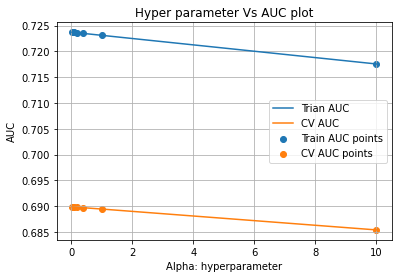

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.093666      0.001192         0.031447        0.000992       0.025   
1       0.086597      0.000995         0.033796        0.003352        0.05   
2       0.090236      0.001151         0.032051        0.001214         0.1   
3       0.087742      0.001687         0.033352        0.002501         0.2   
4       0.087839      0.000862         0.031850        0.000748         0.4   
5       0.089468      0.001611         0.032614        0.002044           1   
6       0.088234      0.001552         0.031284        0.000686          10   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.025}           0.690821           0.689235           0.689551   
1   {'alpha': 0.05}           0.690811           0.689222           0.689541   
2    {'alpha': 0.1}           0.690786           0.689197           0.689522   
3    {'alpha': 0.2}           0.690745         

In [67]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
naive = MultinomialNB()
parameters = {'alpha': [0.025,0.05,0.1,0.2,0.4,1,10]}
cls = GridSearchCV(naive, parameters,cv=3,scoring ='roc_auc',return_train_score= True)
cls.fit(x_tr,y_train)

results = pd.DataFrame.from_dict(cls.cv_results_)

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha_nb =  results['param_alpha']

plt.plot(alpha_nb,train_auc,label='Trian AUC')

plt.plot(alpha_nb,cv_auc,label='CV AUC')

plt.scatter(alpha_nb,train_auc,label='Train AUC points')
plt.scatter(alpha_nb,cv_auc,label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title('Hyper parameter Vs AUC plot')
plt.grid()
plt.show()

print(results)

In [68]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
Best_alpha_1 = 0.025
classifier = MultinomialNB(alpha = Best_alpha_1)
classifier.fit(x_tr,y_train)

y_train_pred = classifier.predict_proba(x_tr)
y_test_pred = classifier.predict_proba(x_te)

train_fpr,train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])

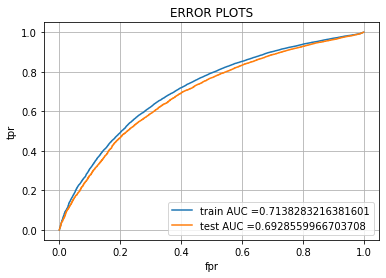

In [69]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [70]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [71]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
best_t = find_best_threshold(tr_thresholds,train_fpr,train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred[:,1], best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred[:,1], best_t)))

the maximum value of tpr*(1-fpr) 0.43959300055237344 for threshold 0.841
Train confusion matrix
[[ 7467  3616]
 [21586 40527]]
Test confusion matrix
[[ 3513  1946]
 [10806 19787]]


### Set 2

In [72]:
x_tr = hstack((x_train_essay_tfidf, x_train_state_ohe, x_train_teacher_prefix_ohe, x_train_pgc_ohe,x_train_clean_cat_ohe,x_train_clean_subcat_ohe, x_train_price_norm)).tocsr()
x_te = hstack((x_test_essay_tfidf, x_test_state_ohe, x_test_teacher_prefix_ohe, x_test_pgc_ohe,x_test_clean_cat_ohe,x_test_clean_subcat_ohe, x_test_price_norm)).tocsr()

print("Final Data matrix")
print(x_tr.shape, y_train.shape)
print(x_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 5100) (73196,)
(36052, 5100) (36052,)


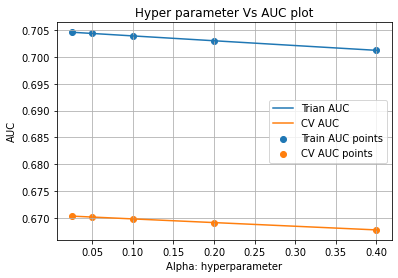

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.091036      0.002191         0.032020        0.000774       0.025   
1       0.088558      0.001098         0.031215        0.000163        0.05   
2       0.089994      0.003485         0.032546        0.001015         0.1   
3       0.091122      0.006288         0.031018        0.000187         0.2   
4       0.090046      0.001873         0.031253        0.000494         0.4   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.025}           0.671612           0.663406           0.675918   
1   {'alpha': 0.05}           0.671440           0.663216           0.675764   
2    {'alpha': 0.1}           0.671087           0.662842           0.675450   
3    {'alpha': 0.2}           0.670411           0.662097           0.674811   
4    {'alpha': 0.4}           0.669043           0.660614           0.673559   

   mean_test_score  std_test_score  rank_tes

In [73]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
naive = MultinomialNB()
parameters = {'alpha': [0.025,0.05,0.1,0.2,0.4]}
cls = GridSearchCV(naive, parameters,cv=3,scoring ='roc_auc',return_train_score= True)
cls.fit(x_tr,y_train)

results = pd.DataFrame.from_dict(cls.cv_results_)

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha_nb =  results['param_alpha']

plt.plot(alpha_nb,train_auc,label='Trian AUC')

plt.plot(alpha_nb,cv_auc,label='CV AUC')

plt.scatter(alpha_nb,train_auc,label='Train AUC points')
plt.scatter(alpha_nb,cv_auc,label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title('Hyper parameter Vs AUC plot')
plt.grid()
plt.show()

print(results)


In [74]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
Best_alpha_2 = 0.025
classifier = MultinomialNB(alpha = Best_alpha_2)
classifier.fit(x_tr,y_train)


y_train_pred = classifier.predict_proba(x_tr)
y_test_pred = classifier.predict_proba(x_te)

train_fpr,train_tpr, tr_thresholds = roc_curve(y_train,y_train_pred[:,1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:,1])


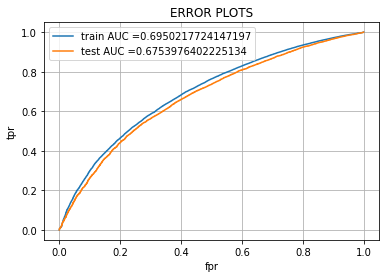

In [75]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [76]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
best_t = find_best_threshold(tr_thresholds,train_fpr,train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred[:,1], best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred[:,1], best_t)))

the maximum value of tpr*(1-fpr) 0.4142411410297641 for threshold 0.85
Train confusion matrix
[[ 7290  3793]
 [22996 39117]]
Test confusion matrix
[[ 3469  1990]
 [11512 19081]]


####Top 20 features

In [77]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)
features = tf_idf_vec.get_feature_names()+ state_features+teacher_prefix_features+project_grade_features+clean_cat_faetures+clean_subcat_features+['price_resources']
feature_prob = classifier.feature_log_prob_

In [78]:
print(type(features),len(features),feature_prob.shape)

<class 'list'> 5100 (2, 5100)


In [79]:
negative_prob = list(map(abs,feature_prob[0]))
positive_prob = list(map(abs,feature_prob[1]))

In [80]:
pos_df= pd.DataFrame(zip(features,positive_prob))
top_20_pos_features =pos_df.sort_values(1,ascending=False)[:20][0].values
top_20_pos_features

array(['dr', 'many us see', 'even earliest',
       'however certainly control experience',
       'lives however certainly control', 'life experiences many',
       'learners continue path academic', 'creative positive way hopeful',
       'getting ahead', 'experiences many us',
       'home lives however certainly', 'however certainly control',
       'school day by', 'lives however certainly', 'life may',
       'inspire even', 'by creative positive way', 'prevent getting',
       'certainly control experience school', 'by creative positive'],
      dtype=object)

In [81]:
neg_df= pd.DataFrame(zip(features,negative_prob))
top_20_neg_features =neg_df.sort_values(1,ascending=False)[:20][0].values
top_20_neg_features

array(['the wobble', 'chromebooks allow', 'chairs help', 'these stools',
       'chairs allow', 'the chromebooks', 'stools allow', 'ipad minis',
       'subscription', 'minis', 'graphing', 'chromebooks would', 'sturdy',
       'the headphones', 'balance balls', 'these chairs',
       'these chromebooks', 'chromebooks students', 'bouncy bands',
       'chromebooks classroom'], dtype=object)

#<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [82]:
#Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/

In [84]:
from prettytable.prettytable import ALL
from prettytable import PrettyTable

mytable = PrettyTable(['Vectorizer','Model','Hyper parameter', 'AUC'])
mytable.add_row(["BOW","MultinomialNB",0.025,0.69])
mytable.add_row(['TFIDF','MultinomialNB',0.025,0.67])
mytable.hrules = ALL

print(mytable)

+------------+---------------+-----------------+------+
| Vectorizer |     Model     | Hyper parameter | AUC  |
+------------+---------------+-----------------+------+
|    BOW     | MultinomialNB |      0.025      | 0.69 |
+------------+---------------+-----------------+------+
|   TFIDF    | MultinomialNB |      0.025      | 0.67 |
+------------+---------------+-----------------+------+
